In [32]:
import pandas as pd
import numpy as np

typesinput = {
    'itemID': np.dtype(int),
    'categoryID': np.dtype(int),
    'title': np.dtype(str),
    'description': np.dtype(str),
    'images_array': np.dtype(str),
    'attrsJSON': np.dtype(str),
    'price': np.dtype(float),
    'locationID': np.dtype(int),
    'metroID': np.dtype(float),
    'lat': np.dtype(float),
    'lon': np.dtype(float),
}

types1 = {
        'itemID_1': np.dtype(int),
        'itemID_2': np.dtype(int),
        'isDuplicate': np.dtype(int),
        'generationMethod': np.dtype(int),
}


In [33]:
%matplotlib inline

Złożenia

* stratified początek (reszta początku porzucona)
* stratified koniec (reszta końca porzucona)
* stratified losowy
* stratified środek (reszta środka porzucona)

zbiór walidacyjny to 20 procent wszystkich danych

In [42]:
pairs = pd.read_csv("input/ItemPairs_train.csv", dtype=types1)

In [39]:
from sklearn.cross_validation import StratifiedKFold

In [84]:
skfold = StratifiedKFold(pairs.isDuplicate, n_folds=4, shuffle=True, random_state=83760324L)
fold_random = skfold.test_folds == 0
skfold = StratifiedKFold(pairs.isDuplicate, n_folds=4, shuffle=False, random_state=83760324L)
fold_start = skfold.test_folds == 0
fold_end = skfold.test_folds == 3
skfold = StratifiedKFold(pairs.isDuplicate, n_folds=8, shuffle=False, random_state=83760324L)
fold_middle = (skfold.test_folds == 3) | (skfold.test_folds == 4)

Każde złożenie ma 316070 duplikatów (na 747850 wszystkich obserwacji) w zbiorze testowym

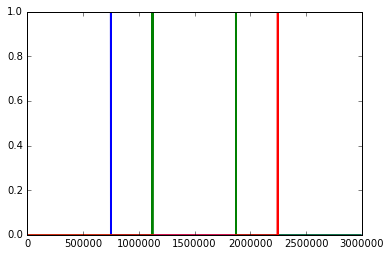

In [89]:
plt.plot(fold_start)
plt.plot(fold_middle)
plt.plot(fold_end)

In [87]:
# Przykład użycia
# test = pairs[fold_start]
# train = pairs[~fold_start]

In [90]:
np.savetxt("folds/fold_random.txt", fold_random, fmt="%5i")
np.savetxt("folds/fold_start.txt", fold_start, fmt="%5i")
np.savetxt("folds/fold_middle.txt", fold_middle, fmt="%5i")
np.savetxt("folds/fold_end.txt", fold_end, fmt="%5i")